# Problem Statement:
The CarDekho company maintains a database of the cars sold through their platform. The data represents the cars sold by Car Dekho and the car related features. We have to build a linear regression model to predict the Selling price of the car. Calculate all the error metrics and diagnostic plots to check the regression result. The dataset contains data for around 301 cars sold by CarDekho.


## Data Description:
- **Car_Name**: Name of the cars.
- **Year**: Year of the car when it was bought.
- **Selling_Price**: Price at which the car is being sold.
- **Present_Price**: Current ex-showroom price of the car.
- **Kms_Driven**: Distance completed by the car in km.
- **Fuel_Type**: Fuel type of the car.
- **Seller_Type**: Tells if a Seller is Individual or a Dealer.
- **Transmission**: Gear transmission of the car (Automatic/Manual).
- **Owner**: Number of previous owners of the car.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

In [2]:
df = pd.read_csv('car data (1) (1).csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
len(df)

301

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
len(df.columns)

9

EXPLORATORY DATA ANALYSIS

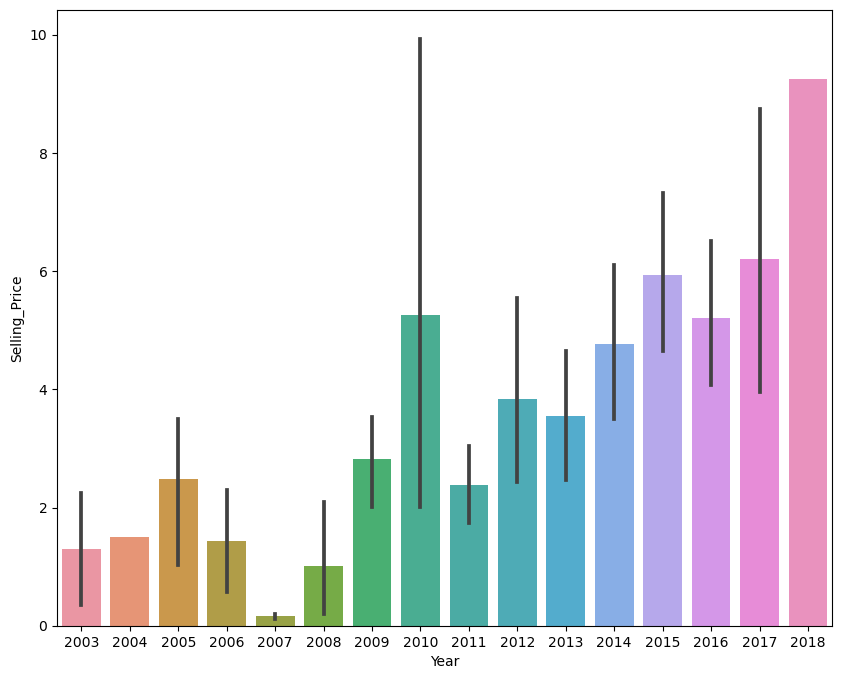

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(data = df,y='Selling_Price',x='Year')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

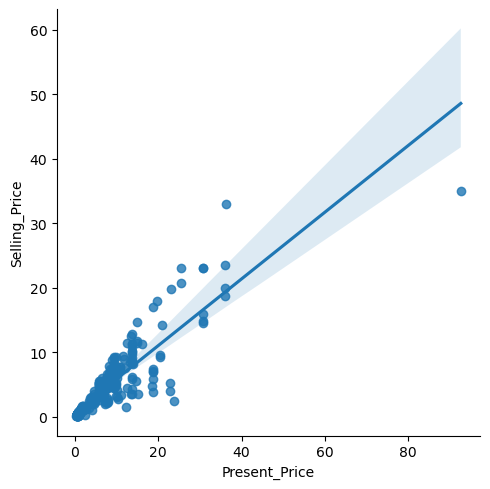

In [9]:
plt.figure(figsize=(10,8))
sns.lmplot(data=df,x='Present_Price',y='Selling_Price')
plt.show()

**As the Present Price increases Selling Price Increases**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x900 with 0 Axes>

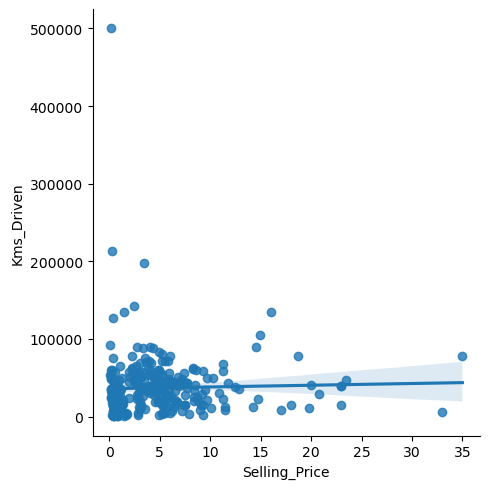

In [10]:
plt.figure(figsize=(10,9))
sns.lmplot(data=df,x='Selling_Price',y='Kms_Driven')
plt.show()

No relationship between Selling_Price and kms_driven

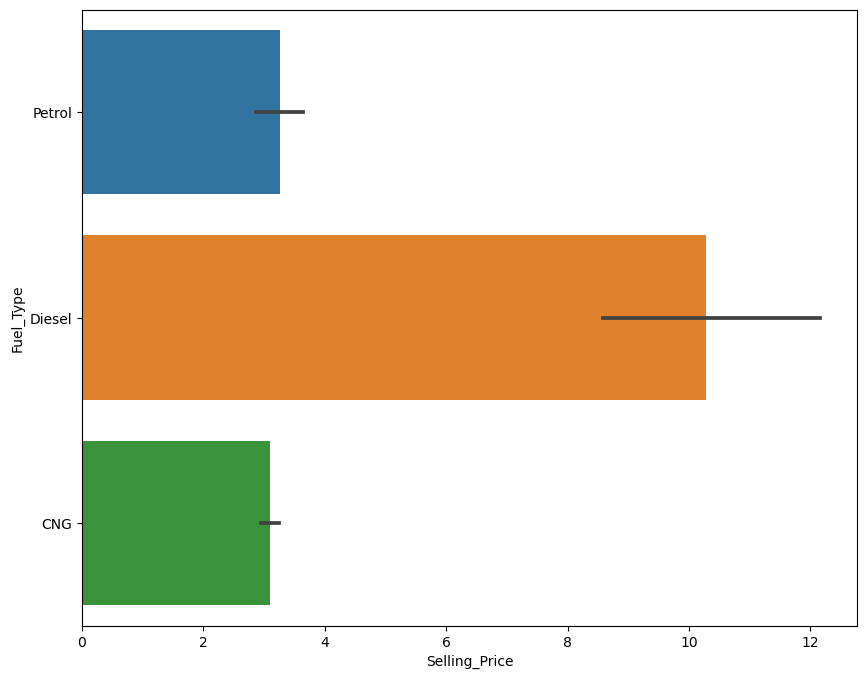

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='Selling_Price',y='Fuel_Type')
plt.show()

**From the following fuel_type Deisel Cars have the highest Selling Price**

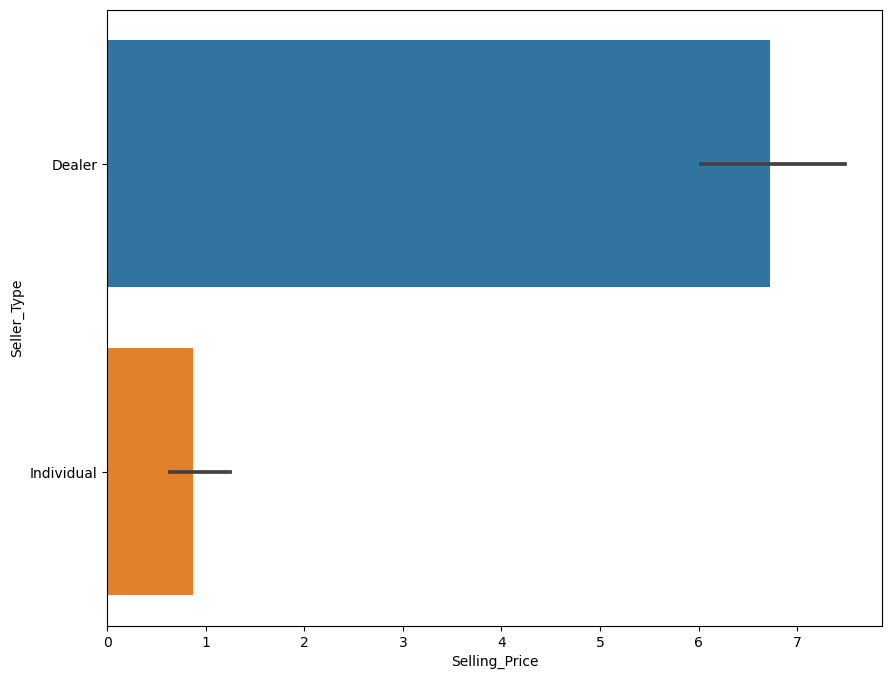

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='Selling_Price',y='Seller_Type')
plt.show()

**If the seller type is dealer Cars have higher selling Price**

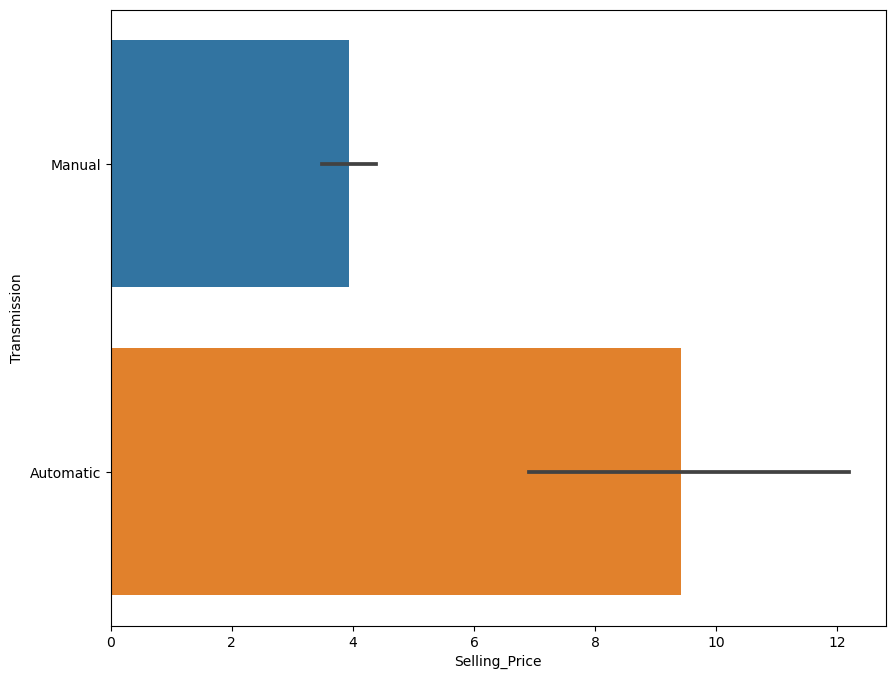

In [13]:

plt.figure(figsize=(10,8))
sns.barplot(data=df,x='Selling_Price',y='Transmission')
plt.show()

**Automatic Cars have the highest Selling Price**

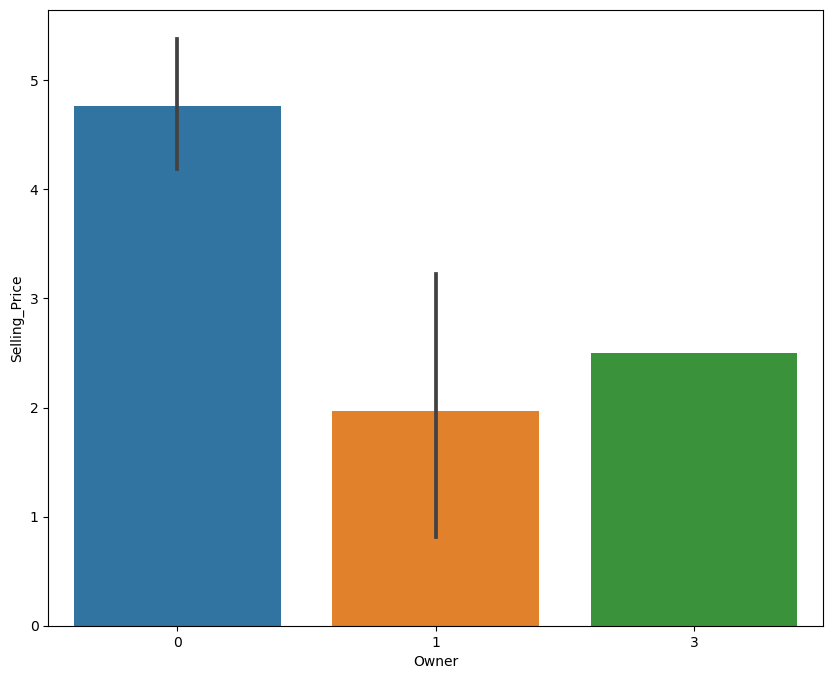

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,y='Selling_Price',x='Owner')
plt.show()

 **Car with No previous owner have highest Selling Price**

# 2.3. Outlier Treatment

In [15]:
def remove_outliers_iqr(df, threshold=1.5):
    
    
    # Identify numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    # Apply outlier removal to numerical columns
    for col in numerical_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df
# Remove outliers using IQR method
df_filtered = remove_outliers_iqr(df)

# Print filtered DataFrame
print("Filtered DataFrame:")
print(df_filtered)

Filtered DataFrame:
    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer

In [16]:
len(df_filtered)

261

MISSING VALUE TREATMENT

In [17]:
df_filtered.isnull().sum()/len(df)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

**In this dataset there are no missing values hence we are good to proceed**

In [18]:
# Separating the numerical and categorical columns
def datatype(dataset):
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype=='int64'or dataset[i].dtype=='float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical,categorical
numerical,categorical = datatype(df_filtered)
    
        

In [19]:
numerical

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [20]:
categorical

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [21]:
# Identifying the binary columns and ignoring them from scaling
def binary_columns(dataset):
    binary_cols = []
    for col in dataset.select_dtypes(include=['int','float']).columns:
        unique_values=dataset[col].unique()
        if np.in1d(unique_values,[0,1]).all():
            binary_cols.append(col)
    return binary_cols
binary_cols = binary_columns(df_filtered)


In [22]:
# Remove the binary columns from numerical:
numerical_updated=[i for i in numerical if i not in binary_cols]

In [23]:
binary_cols

['Owner']

# 2.5. Encoding¶

In [24]:
def encoding(dataset,categorical):
    for i in categorical:
        dataset[i]=dataset[i].astype('category')
        dataset[i]=dataset[i].cat.codes
    return dataset
dataset= encoding(df_filtered,categorical) 
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,81,2014,3.35,5.59,27000,2,0,1,0
1,84,2013,4.75,9.54,43000,1,0,1,0
2,61,2017,7.25,9.85,6900,2,0,1,0
3,87,2011,2.85,4.15,5200,2,0,1,0
4,83,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,62,2016,9.50,11.60,33988,1,0,1,0
297,60,2015,4.00,5.90,60000,2,0,1,0
298,62,2009,3.35,11.00,87934,2,0,1,0
299,62,2017,11.50,12.50,9000,1,0,1,0


**SCALING THE DATA**

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
def feature_scaling(dataset):
    scx = StandardScaler()
    dataset[numerical]=scx.fit_transform(dataset[numerical])
    return dataset
feature_scaling(df_filtered)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,81,0.004882,-0.165821,-0.106591,-0.215719,2,0,1,0.0
1,84,-0.419827,0.288044,0.714035,0.580224,1,0,1,0.0
2,61,1.279008,1.098519,0.778438,-1.215623,2,0,1,0.0
3,87,-1.269244,-0.327916,-0.405756,-1.300192,2,0,1,0.0
4,83,0.004882,0.239416,0.159333,0.552863,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...
296,62,0.854299,1.827946,1.142007,0.131909,1,0,1,0.0
297,60,0.429590,0.044902,-0.042187,1.425913,2,0,1,0.0
298,62,-2.118662,-0.165821,1.017355,2.815530,2,0,1,0.0
299,62,1.279008,2.476325,1.328985,-1.111155,1,0,1,0.0


# Splitting the data into Train and Test

In [27]:
x = dataset.iloc[:,[1,3,4,5,6,7,8]]
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.004882,-0.106591,-0.215719,2,0,1,0.0
1,-0.419827,0.714035,0.580224,1,0,1,0.0
2,1.279008,0.778438,-1.215623,2,0,1,0.0
3,-1.269244,-0.405756,-1.300192,2,0,1,0.0
4,0.004882,0.159333,0.552863,1,0,1,0.0
...,...,...,...,...,...,...,...
296,0.854299,1.142007,0.131909,1,0,1,0.0
297,0.429590,-0.042187,1.425913,2,0,1,0.0
298,-2.118662,1.017355,2.815530,2,0,1,0.0
299,1.279008,1.328985,-1.111155,1,0,1,0.0


In [28]:
y = dataset.iloc[:,2]
y

0     -0.165821
1      0.288044
2      1.098519
3     -0.327916
4      0.239416
         ...   
296    1.827946
297    0.044902
298   -0.165821
299    2.476325
300    0.466349
Name: Selling_Price, Length: 261, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Building the MLR Model

In [30]:
import statsmodels.api as sm

In [31]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [32]:
regression = sm.OLS(endog=y_train, exog=x_train).fit()

In [33]:
regression.summary()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     187.3
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           2.00e-73
Time:                        16:47:35   Log-Likelihood:                -75.711
No. Observations:                 182   AIC:                             165.4
Df Residuals:                     175   BIC:                             187.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8071      0.191      4.218      0.000       0.429       1.185
Year              0.2679      0.033      8.007      0.000       0.202       0.334
Present_Price     0.7075      0.043     16.312      0.000       0.622       0.793
Kms_Driven       -0.1052      0.038     -2.760      0.006      -0.180      -0.030
Fuel_Type        -0.3405      0.078     -4.338      0.000      -0.495      -0.186
Seller_Type      -0.4295      0.092     -4.685      0.000      -0.610      -0.249
Transmission     -0.0412      0.114     -0.362      0.718      -0.266       0.184
Owner                  0          0        nan        nan           0           0
==============================================================================
Omnibus:                        8.603   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               13.407
Skew:                           0.233   Prob(JB):                      0.00123
Kurtosis:                       4.245   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
y_predict= regression.predict(x_test)

##  MLR Model after Removing Insignificant Variables


**As P value is more than 0.05 so we will remove x6 feature**

In [35]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,81,0.004882,-0.165821,-0.106591,-0.215719,2,0,1,0.0
1,84,-0.419827,0.288044,0.714035,0.580224,1,0,1,0.0
2,61,1.279008,1.098519,0.778438,-1.215623,2,0,1,0.0
3,87,-1.269244,-0.327916,-0.405756,-1.300192,2,0,1,0.0
4,83,0.004882,0.239416,0.159333,0.552863,1,0,1,0.0


In [36]:
x = dataset.iloc[:,[1,3,4,5,6,8]]
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Owner
0,0.004882,-0.106591,-0.215719,2,0,0.0
1,-0.419827,0.714035,0.580224,1,0,0.0
2,1.279008,0.778438,-1.215623,2,0,0.0
3,-1.269244,-0.405756,-1.300192,2,0,0.0
4,0.004882,0.159333,0.552863,1,0,0.0
...,...,...,...,...,...,...
296,0.854299,1.142007,0.131909,1,0,0.0
297,0.429590,-0.042187,1.425913,2,0,0.0
298,-2.118662,1.017355,2.815530,2,0,0.0
299,1.279008,1.328985,-1.111155,1,0,0.0


In [37]:
y= dataset.iloc[:,2]
y

0     -0.165821
1      0.288044
2      1.098519
3     -0.327916
4      0.239416
         ...   
296    1.827946
297    0.044902
298   -0.165821
299    2.476325
300    0.466349
Name: Selling_Price, Length: 261, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(y,x,test_size=0.3,random_state=0)

In [39]:
import statsmodels.api as sm

In [40]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [41]:
regression_tuned = sm.OLS(endog = y_train,exog = x_train).fit()

In [42]:
y_pred_tuned = regression_tuned.predict(x_test)

In [47]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Owner
0,0.004882,-0.106591,-0.215719,2,0,0.0
1,-0.419827,0.714035,0.580224,1,0,0.0
2,1.279008,0.778438,-1.215623,2,0,0.0
3,-1.269244,-0.405756,-1.300192,2,0,0.0
4,0.004882,0.159333,0.552863,1,0,0.0
...,...,...,...,...,...,...
296,0.854299,1.142007,0.131909,1,0,0.0
297,0.429590,-0.042187,1.425913,2,0,0.0
298,-2.118662,1.017355,2.815530,2,0,0.0
299,1.279008,1.328985,-1.111155,1,0,0.0


In [48]:
regression_tuned.summary()

ValueError: shapes (182,6) and (182,6) not aligned: 6 (dim 1) != 182 (dim 0)

In [51]:
y_train.shape

(182, 6)

In [56]:
x_train.shape

(182, 2)

#  Ridge regression

In [50]:

ridge_reg = sm.OLS(y_train,x_train_reshaped).fit_regularized(alpha=0.5,L1_wt=0)

ValueError: cannot reshape array of size 364 into shape (2,1)

# Lasso regression

In [53]:
lasso_reg = sm.OLS(y_train, x_train).fit_regularized(alpha=0.5, L1_wt = 1)

ValueError: operands could not be broadcast together with shapes (182,6) (182,) 

# ElasticNet